## Importação de biblioteca e Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
import plotly as pl
import bar_chart_race as bcr

In [2]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 50

In [3]:
df = pd.read_excel("US Superstore data.xlsx")

## Visualização dos dados

In [4]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [5]:
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [6]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [8]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [9]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
df["Country"].unique()

array(['United States'], dtype=object)

In [11]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [12]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1552,1553,CA-2014-130274,2014-05-03,2014-05-05,First Class,JS-15940,Joni Sundaresam,Home Office,United States,Appleton,Wisconsin,54915,Central,OFF-LA-10002195,Office Supplies,Labels,Avery 481,21.560,7,0.0,10.3488
250,251,CA-2016-145625,2016-09-11,2016-09-17,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,California,92037,West,OFF-PA-10004569,Office Supplies,Paper,"Wirebound Message Books, Two 4 1/4"" x 5"" Forms...",7.610,1,0.0,3.5767
885,886,CA-2015-143602,2015-04-25,2015-04-28,Second Class,JS-15595,Jill Stevenson,Corporate,United States,Los Angeles,California,90045,West,OFF-BI-10002071,Office Supplies,Binders,Fellowes Black Plastic Comb Bindings,13.944,3,0.2,4.5318
2985,2986,CA-2016-139269,2016-05-25,2016-05-30,Standard Class,JB-16045,Julia Barnett,Home Office,United States,Columbus,Georgia,31907,South,FUR-FU-10000755,Furniture,Furnishings,Eldon Expressions Mahogany Wood Desk Collection,24.960,4,0.0,6.2400
5879,5880,CA-2016-133319,2016-09-05,2016-09-11,Standard Class,MV-17485,Mark Van Huff,Consumer,United States,New York City,New York,10011,East,OFF-PA-10001815,Office Supplies,Paper,Xerox 1885,192.160,4,0.0,92.2368
5313,5314,CA-2017-137876,2017-04-30,2017-05-05,Standard Class,DJ-13510,Don Jones,Corporate,United States,San Francisco,California,94110,West,FUR-FU-10000222,Furniture,Furnishings,"Seth Thomas 16"" Steel Case Clock",64.960,2,0.0,21.4368
7422,7423,US-2016-114013,2016-03-13,2016-03-15,Second Class,SC-20770,Stewart Carmichael,Corporate,United States,Philadelphia,Pennsylvania,19134,East,TEC-MA-10001148,Technology,Machines,Okidata MB491 Multifunction Printer,449.100,3,0.7,-643.7100
3266,3267,US-2014-126571,2014-10-11,2014-10-15,Standard Class,JF-15565,Jill Fjeld,Consumer,United States,Philadelphia,Pennsylvania,19120,East,OFF-EN-10002230,Office Supplies,Envelopes,Airmail Envelopes,201.432,3,0.2,67.9833
1570,1571,US-2014-157385,2014-11-23,2014-11-25,First Class,SC-20095,Sanjit Chand,Consumer,United States,Los Angeles,California,90004,West,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,603.920,5,0.2,-67.9410
6332,6333,CA-2014-167927,2014-01-20,2014-01-26,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,Michigan,48185,Central,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,14.730,3,0.0,4.8609


In [13]:
print(f"O Data Frame tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O Data Frame tem 9994 linhas e 21 colunas


In [14]:
df = df.rename(columns = {"Row ID": "ID Linha","Order ID": "ID Pedido","Order Date": "Data do Pedido", "Ship Date": "Data de envio", "Ship Mode": "Modo de envio", "Customer ID": "ID Cliente", "Customer Name": "Nome Cliente", "Segment": "Segmento", "Country": "País", "City":"Cidade", "State":"Estado","Postal Code":"Código Postal",
"Region": "Região", "Product ID":"ID Produto", "Category": "Categoria", "Sub-Category": "Sub-Categoria", "Product Name":"Nome do Produto", "Sales":"Valor do Pedido", "Quantity":"Quantidade", "Discount": "Desconto", "Profit": "Lucro"})

In [15]:
df.head()

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Limpeza dos dados

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID Linha         9994 non-null   int64         
 1   ID Pedido        9994 non-null   object        
 2   Data do Pedido   9994 non-null   datetime64[ns]
 3   Data de envio    9994 non-null   datetime64[ns]
 4   Modo de envio    9994 non-null   object        
 5   ID Cliente       9994 non-null   object        
 6   Nome Cliente     9994 non-null   object        
 7   Segmento         9994 non-null   object        
 8   País             9994 non-null   object        
 9   Cidade           9994 non-null   object        
 10  Estado           9994 non-null   object        
 11  Código Postal    9994 non-null   int64         
 12  Região           9994 non-null   object        
 13  ID Produto       9994 non-null   object        
 14  Categoria        9994 non-null   object 

In [17]:
df.isnull().values.any()

False

In [18]:
df[df.duplicated()]

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro


In [19]:
df.loc[df["Quantidade"] == 0]

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro


In [20]:
df.loc[df["Valor do Pedido"] == 0]

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro


In [21]:
Group_nome_client=df.groupby(df["Nome Cliente"], as_index=False)["ID Cliente"].nunique()
Group_nome_client

,Nome Cliente,ID Cliente
0,Aaron Bergman,1
1,Aaron Hawkins,1
2,Aaron Smayling,1
3,Adam Bellavance,1
4,Adam Hart,1
...,...,...
788,Xylona Preis,1
789,Yana Sorensen,1
790,Yoseph Carroll,1
791,Zuschuss Carroll,1


In [22]:
Group_nome_client.loc[Group_nome_client["ID Cliente"] > 1]

,Nome Cliente,ID Cliente


In [23]:
df.drop(['ID Linha'], axis='columns', inplace=True)

In [24]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
df["Tempo de Envio"] = df["Data de envio"] - df["Data do Pedido"]

In [26]:
df.head(20)

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5 days
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,5 days
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,5 days
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,5 days
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,5 days


In [27]:
print(df["Tempo de Envio"].max())
print(df["Tempo de Envio"].min())

7 days 00:00:00
0 days 00:00:00


In [28]:
print(df["Tempo de Envio"].median())

4 days 00:00:00


<AxesSubplot:xlabel='Tempo de Envio'>

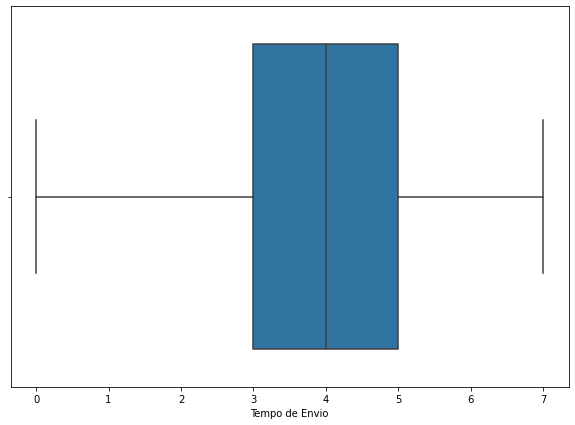

In [29]:
plt.figure(figsize =(10,7))
sb.boxplot(x=df["Tempo de Envio"].dt.days)


In [30]:
print(f'Quantidade de ID de produtos: {len(df["ID Produto"].unique())}')
print(f'Quantidade de produtos únicos: {len(df["Nome do Produto"].unique())}')

Quantidade de ID de produtos: 1862
Quantidade de produtos únicos: 1850


In [31]:
Group_nome_prod=df.groupby(df["Nome do Produto"], as_index=False)["ID Produto"].nunique()
Group_nome_prod

,Nome do Produto,ID Produto
0,"""While you Were Out"" Message Book, One Form pe...",1
1,"#10 Gummed Flap White Envelopes, 100/Box",1
2,#10 Self-Seal White Envelopes,1
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",1
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,1
1846,iOttie HLCRIO102 Car Mount,1
1847,iOttie XL Car Mount,1
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,1


In [32]:
Group_nome_prod.loc[Group_nome_prod["ID Produto"] > 1]

,Nome do Produto,ID Produto
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
259,Avery Non-Stick Binders,2
537,Easy-staple paper,8
591,Eldon Wave Desk Accessories,2
942,KI Adjustable-Height Table,2
1217,Okidata C610n Printer,2
1249,"Peel & Seel Recycled Catalog Envelopes, Brown",2
1297,Prang Drawing Pencil Set,2
1493,Staple envelope,9
1494,Staple holder,3


In [33]:
Group_ID_prod=df.groupby(df["ID Produto"], as_index=False)["Nome do Produto"].nunique()
Group_ID_prod

,ID Produto,Nome do Produto
0,FUR-BO-10000112,1
1,FUR-BO-10000330,1
2,FUR-BO-10000362,1
3,FUR-BO-10000468,1
4,FUR-BO-10000711,1
...,...,...
1857,TEC-PH-10004912,1
1858,TEC-PH-10004922,1
1859,TEC-PH-10004924,1
1860,TEC-PH-10004959,1


In [34]:
Group_ID_prod.loc[Group_ID_prod["Nome do Produto"] > 1]

,ID Produto,Nome do Produto
18,FUR-BO-10002213,2
65,FUR-CH-10001146,2
183,FUR-FU-10001473,2
284,FUR-FU-10004017,2
290,FUR-FU-10004091,2
295,FUR-FU-10004270,2
310,FUR-FU-10004848,2
311,FUR-FU-10004864,2
387,OFF-AP-10000576,2
506,OFF-AR-10001149,2


In [35]:
df.loc[df["ID Produto"] == "FUR-BO-10002213"]

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio
2115,CA-2015-164882,2015-10-31,2015-10-31,Same Day,SG-20080,Sandra Glassco,Consumer,United States,Redlands,California,92374,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,425.833,1,0.15,20.0392,0 days
2471,US-2016-135923,2016-01-22,2016-01-28,Standard Class,CM-11935,Carlos Meador,Consumer,United States,Fayetteville,North Carolina,28314,South,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",451.136,4,0.20,-67.6704,6 days
2808,CA-2015-148635,2015-07-25,2015-07-27,Second Class,MH-18025,Michelle Huthwaite,Consumer,United States,Seattle,Washington,98115,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",704.900,5,0.00,56.3920,2 days
5079,US-2017-133312,2017-11-25,2017-11-29,Standard Class,BD-11500,Bradley Drucker,Consumer,United States,San Francisco,California,94122,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",359.499,3,0.15,-29.6058,4 days
5918,US-2015-126977,2015-09-17,2015-09-23,Standard Class,PF-19120,Peter Fuller,Consumer,United States,New York City,New York,10035,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,2003.920,5,0.20,-25.0490,6 days
6535,CA-2014-128209,2014-11-17,2014-11-22,Standard Class,GT-14710,Greg Tran,Consumer,United States,Buffalo,New York,14215,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,4007.840,10,0.20,-50.0980,5 days
8712,US-2015-145422,2015-12-03,2015-12-07,Standard Class,PW-19240,Pierre Wener,Consumer,United States,San Francisco,California,94110,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",359.499,3,0.15,-29.6058,4 days
9395,CA-2014-125997,2014-09-20,2014-09-23,First Class,MW-18220,Mitch Webber,Consumer,United States,New York City,New York,10011,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,801.568,2,0.20,-10.0196,3 days
9583,CA-2017-116127,2017-06-25,2017-06-27,Second Class,SB-20185,Sarah Brown,Consumer,United States,New York City,New York,10024,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,400.784,1,0.20,-5.0098,2 days
9649,CA-2016-107104,2016-11-26,2016-11-30,Standard Class,MS-17365,Maribeth Schnelling,Consumer,United States,Los Angeles,California,90045,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,3406.664,8,0.15,160.3136,4 days


In [36]:
df.loc[df["Nome do Produto"] == "Easy-staple paper"]

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,4 days
283,CA-2015-130883,2015-09-26,2015-10-02,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Portland,Oregon,97206,West,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,141.760,5,0.2,47.8440,6 days
347,CA-2017-134306,2017-07-08,2017-07-12,Standard Class,TD-20995,Tamara Dahlen,Consumer,United States,Lowell,Massachusetts,1852,East,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,24.560,2,0.0,11.5432,4 days
666,CA-2017-132682,2017-06-08,2017-06-10,Second Class,TH-21235,Tiffany House,Corporate,United States,Dallas,Texas,75081,Central,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,85.056,3,0.2,28.7064,2 days
1028,CA-2014-163552,2014-07-11,2014-07-15,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Hackensack,New Jersey,7601,East,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,177.200,5,0.0,83.2840,4 days
1080,CA-2015-110016,2015-11-29,2015-12-04,Standard Class,BT-11395,Bill Tyler,Corporate,United States,Detroit,Michigan,48227,Central,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,19.920,4,0.0,9.3624,5 days
1083,US-2016-143819,2016-03-01,2016-03-05,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,New York,10701,East,OFF-PA-10003127,Office Supplies,Paper,Easy-staple paper,26.380,1,0.0,12.1348,4 days
1225,CA-2016-126004,2016-12-04,2016-12-05,First Class,BM-11140,Becky Martin,Consumer,United States,New York City,New York,10024,East,OFF-PA-10001685,Office Supplies,Paper,Easy-staple paper,40.560,4,0.0,19.8744,1 days
1451,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Mark Cousins,Corporate,United States,Mobile,Alabama,36608,South,OFF-PA-10001685,Office Supplies,Paper,Easy-staple paper,70.980,7,0.0,34.7802,3 days
1702,CA-2015-114069,2015-07-13,2015-07-15,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,New York City,New York,10035,East,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,9.960,2,0.0,4.6812,2 days


## Transformação dos dados

In [37]:
df[["Ano do Pedido","Mês do Pedido","Dia do Pedido"]] = df["Data do Pedido"].astype(str).str.split("-",3,expand = True)
df[["Ano de Envio","Mês de Envio","Dia de Envio"]] = df["Data de envio"].astype(str).str.split("-",3,expand = True)

In [38]:
df[["Ano do Pedido","Mês do Pedido","Dia do Pedido"]] = df[["Ano do Pedido","Mês do Pedido","Dia do Pedido"]].astype("int64")
df[["Ano de Envio","Mês de Envio","Dia de Envio"]] = df[["Ano de Envio","Mês de Envio","Dia de Envio"]].astype("int64")

In [39]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11,8,2016,11,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11,8,2016,11,11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6,12,2016,6,16
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10,11,2015,10,18


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   ID Pedido        9994 non-null   object         
 1   Data do Pedido   9994 non-null   datetime64[ns] 
 2   Data de envio    9994 non-null   datetime64[ns] 
 3   Modo de envio    9994 non-null   object         
 4   ID Cliente       9994 non-null   object         
 5   Nome Cliente     9994 non-null   object         
 6   Segmento         9994 non-null   object         
 7   País             9994 non-null   object         
 8   Cidade           9994 non-null   object         
 9   Estado           9994 non-null   object         
 10  Código Postal    9994 non-null   int64          
 11  Região           9994 non-null   object         
 12  ID Produto       9994 non-null   object         
 13  Categoria        9994 non-null   object         
 14  Sub-Categoria    9994 no

In [41]:
def preço_unitario(vendas,quantidade,desconto):
    
    preço_unitario = (vendas/(1-desconto))/quantidade
    
    return(preço_unitario)

#test
preço_unitario(320,4,0.2)

100.0

In [42]:
df["Preço Unitário Produto"] = preço_unitario(df["Valor do Pedido"],df["Quantidade"],df["Desconto"])

In [43]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11,8,2016,11,11,130.98
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11,8,2016,11,11,243.98
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6,12,2016,6,16,7.31
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18,348.21
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10,11,2015,10,18,13.98


In [44]:
#vamos verificar se o preço unitario para o mesmo produto bate
df.loc[df["Nome do Produto"] == "Bretford CR4500 Series Slim Rectangular Table"]

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18,348.21
24,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,5 days,2015,9,25,2015,9,30,348.21
942,CA-2016-142958,2016-12-13,2016-12-20,Standard Class,RW-19630,Rob Williams,Corporate,United States,Torrance,California,90503,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1114.2720,4,0.20,41.7852,7 days,2016,12,13,2016,12,20,348.21
1562,US-2017-102890,2017-06-30,2017-06-30,Same Day,SG-20470,Sheri Gordon,Consumer,United States,New York City,New York,10011,East,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,5,0.40,-295.9785,0 days,2017,6,30,2017,6,30,348.21
2609,CA-2014-127446,2014-11-25,2014-11-30,Standard Class,MC-17590,Matt Collister,Corporate,United States,Arlington,Texas,76017,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1218.7350,5,0.30,-121.8735,5 days,2014,11,25,2014,11,30,348.21
4192,CA-2015-150875,2015-11-16,2015-11-20,Standard Class,HK-14890,Heather Kirkland,Corporate,United States,Boise,Idaho,83704,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,696.4200,2,0.00,160.1766,4 days,2015,11,16,2015,11,20,348.21
6438,US-2017-113992,2017-12-14,2017-12-19,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Plano,Texas,75023,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,974.9880,4,0.30,-97.4988,5 days,2017,12,14,2017,12,19,348.21
8206,CA-2015-122266,2015-04-26,2015-04-30,Standard Class,SA-20830,Sue Ann Reed,Consumer,United States,Daytona Beach,Florida,32114,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,191.5155,1,0.45,-76.6062,4 days,2015,4,26,2015,4,30,348.21


Coluna de desconto em dólares

In [61]:
def desconto_dolar(preco_uni,quant,desconto):
    desconto_dolar = (preco_uni * quant)*desconto
    return desconto_dolar

desconto_dolar(348.21,4,0.30)

417.852

In [62]:
df["Desconto em Dólar"] = desconto_dolar(df["Preço Unitário Produto"],df["Quantidade"],df["Desconto"])

In [63]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto,Desconto em Dólar
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11,8,2016,11,11,130.98,0.0000
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11,8,2016,11,11,243.98,0.0000
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6,12,2016,6,16,7.31,0.0000
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18,348.21,783.4725
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10,11,2015,10,18,13.98,5.5920


In [72]:
def lucro_unitario(desconto,lad,quantidade):
    lucro_unitario = (desconto + lad)/quantidade
    return lucro_unitario

lucro_unitario(522.3150,-121.8735,5)

80.0883

In [79]:
df["Lucro por produto unitário"] = lucro_unitario(df["Desconto em Dólar"],df["Lucro"],df["Quantidade"])
df["Lucro após o desconto"] = df["Lucro"]
df.drop(['Lucro'], axis='columns', inplace=True)

In [81]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto,Desconto em Dólar,Lucro por produto unitário,Lucro após o desconto
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,3 days,2016,11,8,2016,11,11,130.98,0.0000,20.9568,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,3 days,2016,11,8,2016,11,11,243.98,0.0000,73.1940,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,4 days,2016,6,12,2016,6,16,7.31,0.0000,3.4357,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,7 days,2015,10,11,2015,10,18,348.21,783.4725,80.0883,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,7 days,2015,10,11,2015,10,18,13.98,5.5920,4.0542,2.5164


In [83]:
#Organizar as colunas
df = df[["ID Pedido","Data do Pedido","Ano do Pedido","Mês do Pedido","Dia do Pedido","Data de envio","Ano de Envio","Mês de Envio","Dia de Envio","Tempo de Envio","ID Cliente","Nome Cliente","Segmento","País","Cidade","Estado","Código Postal","Região","ID Produto","Categoria","Sub-Categoria","Nome do Produto","Valor do Pedido","Quantidade","Desconto","Desconto em Dólar","Lucro após o desconto","Preço Unitário Produto","Lucro por produto unitário"]]

In [84]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542


## Respondendo as questões de negócios

### Otimização de estoque
1 - Quais produtos apresentam alta demanda?

In [45]:
Filtro_Quantidade_Produto = df.groupby(df["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
Filtro_Quantidade_Produto[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150
1500,Staples in misc. colors,86
942,KI Adjustable-Height Table,74
259,Avery Non-Stick Binders,71
1511,Storex Dura Pro Binders,71
699,GBC Premium Transparent Covers with Diagonal Lined Pattern,67
1450,"Situations Contoured Folding Chairs, 4/Set",64
1497,Staple-based wall hangings,62


In [46]:
ano_nomeprod_quant_luc = df[['Ano do Pedido','Nome do Produto','Quantidade','Lucro']]
ano_nomeprod_quant_luc

,Ano do Pedido,Nome do Produto,Quantidade,Lucro
0,2016,Bush Somerset Collection Bookcase,2,41.9136
1,2016,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,219.5820
2,2016,Self-Adhesive Address Labels for Typewriters b...,2,6.8714
3,2015,Bretford CR4500 Series Slim Rectangular Table,5,-383.0310
4,2015,Eldon Fold 'N Roll Cart System,2,2.5164
...,...,...,...,...
9989,2014,Ultra Door Pull Handle,3,4.1028
9990,2017,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,15.6332
9991,2017,Aastra 57i VoIP phone,2,19.3932
9992,2017,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,13.3200


In [47]:
vendas_quant_2017 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2017]
vendas_quant_2016 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2016]
vendas_quant_2015 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2015]
vendas_quant_2014 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2014]
vendas_quant_2014

,Ano do Pedido,Nome do Produto,Quantidade,Lucro
5,2014,Eldon Expressions Wood and Plastic Desk Access...,7,14.1694
6,2014,Newell 322,4,1.9656
7,2014,Mitel 5320 IP Phone VoIP phone,6,90.7152
8,2014,DXL Angle-View Binders with Locking Rings by S...,3,5.7825
9,2014,Belkin F5C206VTEL 6 Outlet Surge,5,34.4700
...,...,...,...,...
9946,2014,Hypercom P1300 Pinpad,3,32.1300
9956,2014,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",5,21.7845
9957,2014,Xerox 1882,4,109.7208
9958,2014,Acme Value Line Scissors,2,2.1900


In [48]:
vendas_quant_2017 = vendas_quant_2017.groupby(vendas_quant_2017["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2017[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2017").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
1226,Staples,68
455,Easy-staple paper,58
1227,Staples in misc. colors,52
1221,Staple envelope,39
1233,Storex Dura Pro Binders,37
888,Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive,34
494,Eldon Wave Desk Accessories,34
810,"Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table",30
97,Adjustable Depth Letter/Legal Cart,29
824,Logitech Desktop MK120 Mouse and keyboard Combo,29


In [49]:
vendas_quant_2016 = vendas_quant_2016.groupby(vendas_quant_2016["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2016[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2016").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
1106,Staples,56
324,Chromcraft Round Conference Tables,39
1100,Staple envelope,34
400,Easy-staple paper,31
1209,Wilson Jones Turn Tabs Binder Tool for Ring Binders,30
635,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",30
441,"Electrix Architect's Clamp-On Swing Arm Lamp, Black",28
1350,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",27
1240,Xerox 1898,27
511,GBC Ibimaster 500 Manual ProClick Binding System,26


In [50]:
vendas_quant_2015 = vendas_quant_2015.groupby(vendas_quant_2015["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2015[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2015").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
994,Staple envelope,43
999,Staples,39
350,Easy-staple paper,39
379,Eldon ProFile File 'N Store Portable File Tub Letter/Legal Size Black,26
1120,Xerox 1883,25
390,Enermax Acrylux Wireless Keyboard,24
126,Avery 485,24
182,"BOSTON Model 1800 Electric Pencil Sharpeners, Putty/Woodgrain",23
421,Fellowes Officeware Wire Shelving,22
509,"Global Push Button Manager's Chair, Indigo",22


In [51]:
vendas_quant_2014 = vendas_quant_2014.groupby(vendas_quant_2014["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2014[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2014").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
989,Staple envelope,54
995,Staples,52
628,KI Adjustable-Height Table,29
970,"Southworth 100% Résumé Paper, 24lb.",28
699,"Maxell 74 Minute CD-R Spindle, 50/Pack",24
896,SAFCO Arco Folding Chair,23
606,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",22
353,Easy-staple paper,22
174,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",22
1021,Tennsco 6- and 18-Compartment Lockers,22


2- Quais produtos tem pouca saída ou estão fincando obsoletos?

In [52]:
Filtro_Quantidade_Produto_bottom10 = df.groupby(df["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=True)
Filtro_Quantidade_Produto_bottom10[:30].style.background_gradient(cmap='Greys',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
356,Boston 1900 Electric Pencil Sharpener,1
385,"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
1253,Penpower WorldCard Pro Card Scanner,1
749,Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1
1793,Xerox 20,1
605,Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,2
405,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,2
1780,Xerox 1989,2
1110,NeatDesk Desktop Scanner & Digital Filing System,2
1321,RCA ViSYS 25423RE1 Corded phone,2


In [53]:
Filtro_Quantidade_Produto_date = df[["Nome do Produto", "Data do Pedido"]]
Filtro_Quantidade_Produto_date.sort_values(by = "Data do Pedido",ascending = True)

,Nome do Produto,Data do Pedido
7980,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",2014-01-03
739,Avery 508,2014-01-04
740,SAFCO Boltless Steel Shelving,2014-01-04
741,GBC Standard Plastic Binding Systems Combs,2014-01-04
1759,Avery Hi-Liter EverBold Pen Style Fluorescent ...,2014-01-05
...,...,...
5091,Bagged Rubber Bands,2017-12-30
908,Wilson Jones Legal Size Ring Binders,2017-12-30
907,Gear Head AU3700S Headset,2017-12-30
1296,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",2017-12-30


In [54]:
Filtro_Quantidade_Produto_date = Filtro_Quantidade_Produto_date.groupby(Filtro_Quantidade_Produto_date["Nome do Produto"]).max().sort_values(by= "Data do Pedido", ascending = True)

In [55]:
Filtro_Quantidade_Produto_date[:20].style.set_properties(**{'text-align': 'center'},subset=['Data do Pedido']).set_table_styles([dict(selector='th',props=[('text-align', 'left')])])

,Data do Pedido
Nome do Produto,
Xerox 1926,2014-03-17 00:00:00
Xerox 1918,2014-03-17 00:00:00
Cisco TelePresence System EX90 Videoconferencing Unit,2014-03-18 00:00:00
Hewlett-Packard Deskjet 6540 Color Inkjet Printer,2014-03-18 00:00:00
"Sanford Colorific Scented Colored Pencils, 12/Pack",2014-06-02 00:00:00
Epson Perfection V600 Photo Scanner,2014-06-21 00:00:00
Acco 6 Outlet Guardian Basic Surge Suppressor,2014-07-21 00:00:00
Logitech Illuminated Ultrathin Keyboard with Backlighting,2014-07-26 00:00:00
"Hon Metal Bookcases, Gray",2014-08-19 00:00:00


## Elasticidade de Preço
1- Quanta margem de lucro tenho sobre os produtos?

In [56]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11,8,2016,11,11,130.98
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11,8,2016,11,11,243.98
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6,12,2016,6,16,7.31
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18,348.21
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10,11,2015,10,18,13.98


In [57]:
df.loc[df["Nome do Produto"] == "Eldon Fold 'N Roll Cart System"]

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,7 days,2015,10,11,2015,10,18,13.98
2829,CA-2016-124149,2016-04-23,2016-04-26,First Class,MJ-17740,Max Jones,Consumer,United States,Lancaster,Ohio,43130,East,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,55.920,5,0.2,6.2910,3 days,2016,4,23,2016,4,26,13.98
2995,US-2014-150532,2014-07-14,2014-07-21,Standard Class,PB-19150,Philip Brown,Consumer,United States,Phoenix,Arizona,85023,West,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,55.920,5,0.2,6.2910,7 days,2014,7,14,2014,7,21,13.98
6326,CA-2014-167927,2014-01-20,2014-01-26,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,Michigan,48185,Central,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,13.980,1,0.0,4.0542,6 days,2014,1,20,2014,1,26,13.98
7371,US-2017-123862,2017-01-07,2017-01-09,Second Class,JF-15190,Jamie Frazer,Consumer,United States,Long Beach,California,90805,West,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,153.780,11,0.0,44.5962,2 days,2017,1,7,2017,1,9,13.98


In [95]:
#vamos criar uma função para verificar os nomes dos produtos a  partir do ID
def nome_produto(id_do_produto):
    id_produto = df.loc[df["ID Produto"] == id_do_produto]["Nome do Produto"].reset_index()
    nome_do_produto = id_produto.iloc[0]["Nome do Produto"]
    return(nome_do_produto)

#testando

nome_produto("TEC-AC-10003832")

'Logitech\xa0P710e Mobile Speakerphone'

In [96]:
nomes = top_10_produtos_quantidade["ID Produto"].apply(lambda x: nome_produto(x))
nomes

1569                   Logitech P710e Mobile Speakerphone
1144                                           Xerox 1881
694     GBC Premium Transparent Covers with Diagonal L...
93             Situations Contoured Folding Chairs, 4/Set
721                               Avery Arch Ring Binders
325                    Chromcraft Round Conference Tables
1517            Logitech G19 Programmable Gaming Keyboard
835     Wilson Jones Turn Tabs Binder Tool for Ring Bi...
110       Global Wood Trimmed Manager's Task Chair, Khaki
1548           Kingston Digital DataTraveler 16GB USB 2.0
Name: ID Produto, dtype: object

In [98]:
top_10_produtos_quantidade

,ID Produto,Quantidade,Nome Produto
1569,TEC-AC-10003832,75,Logitech P710e Mobile Speakerphone
1144,OFF-PA-10001970,70,Xerox 1881
694,OFF-BI-10001524,67,GBC Premium Transparent Covers with Diagonal L...
93,FUR-CH-10002647,64,"Situations Contoured Folding Chairs, 4/Set"
721,OFF-BI-10002026,64,Avery Arch Ring Binders
325,FUR-TA-10001095,61,Chromcraft Round Conference Tables
1517,TEC-AC-10002049,60,Logitech G19 Programmable Gaming Keyboard
835,OFF-BI-10004728,59,Wilson Jones Turn Tabs Binder Tool for Ring Bi...
110,FUR-CH-10003774,59,"Global Wood Trimmed Manager's Task Chair, Khaki"
1548,TEC-AC-10003038,57,Kingston Digital DataTraveler 16GB USB 2.0


Text(0.5, 1.0, 'Ranking Top 10 Produtos Mais Vendidos')

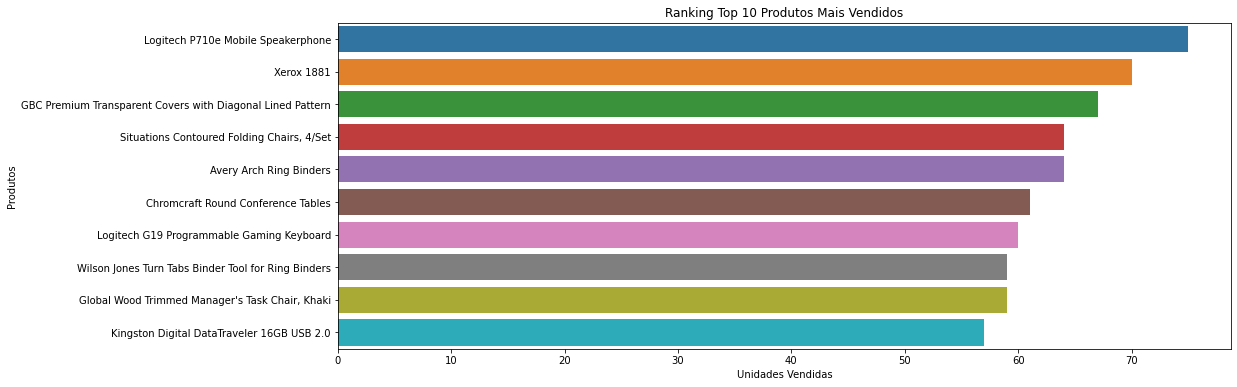

In [99]:
#Vamos plotar um grafico para podermos visualizar melhor isso
plt.figure(figsize =(16,6))
sb.barplot(x = "Quantidade",y = "Nome Produto", data = top_10_produtos_quantidade )
plt.ylabel("Produtos")
plt.xlabel("Unidades Vendidas")
plt.title("Ranking Top 10 Produtos Mais Vendidos")

Vamos agora ver os produtos com alta demanda do último ano e comparar

In [100]:
df['Ano do Pedido'].unique()

array([2016, 2015, 2014, 2017], dtype=int64)

In [110]:
ano_id_nome = df[['Ano do Pedido','ID Produto','Nome do Produto','Quantidade','Lucro']]
ano_id_nome

,Ano do Pedido,ID Produto,Nome do Produto,Quantidade,Lucro
0,2016,FUR-BO-10001798,Bush Somerset Collection Bookcase,2,41.9136
1,2016,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,219.5820
2,2016,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,2,6.8714
3,2015,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,5,-383.0310
4,2015,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,2,2.5164
...,...,...,...,...,...
9989,2014,FUR-FU-10001889,Ultra Door Pull Handle,3,4.1028
9990,2017,FUR-FU-10000747,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,15.6332
9991,2017,TEC-PH-10003645,Aastra 57i VoIP phone,2,19.3932
9992,2017,OFF-PA-10004041,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,13.3200


In [111]:
Vendas_2017 = ano_id_nome.loc[ano_id_nome['Ano do Pedido'] == 2017]
Vendas_2016 = ano_id_nome.loc[ano_id_nome['Ano do Pedido'] == 2016]
Vendas_2015 = ano_id_nome.loc[ano_id_nome['Ano do Pedido'] == 2015]
Vendas_2014 = ano_id_nome.loc[ano_id_nome['Ano do Pedido'] == 2014]
Vendas_2017

,Ano do Pedido,ID Produto,Nome do Produto,Quantidade,Lucro
12,2017,OFF-PA-10002365,Xerox 1967,3,5.4432
23,2017,FUR-CH-10002774,"Global Deluxe Stacking Chair, Gray",2,-1.0196
34,2017,OFF-PA-10000249,Easy-staple paper,3,9.9468
41,2017,TEC-PH-10004093,Panasonic Kx-TS550,4,16.5564
43,2017,OFF-ST-10003282,"Advantus 10-Drawer Portable Organizer, Chrome ...",2,9.5616
...,...,...,...,...,...
9988,2017,TEC-PH-10004006,Panasonic KX - TS880B Telephone,5,55.6470
9990,2017,FUR-FU-10000747,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,15.6332
9991,2017,TEC-PH-10003645,Aastra 57i VoIP phone,2,19.3932
9992,2017,OFF-PA-10004041,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,13.3200


In [246]:
top_10_vendas_2017 = Vendas_2017.groupby(Vendas_2017['Nome do Produto'], as_index = False)['Quantidade'].sum().sort_values(by = 'Quantidade', ascending = False).head(10)
top_10_vendas_2016 = Vendas_2016.groupby(Vendas_2016['Nome do Produto'], as_index = False)['Quantidade'].sum().sort_values(by = 'Quantidade', ascending = False).head(10)
top_10_vendas_2015 = Vendas_2015.groupby(Vendas_2015['Nome do Produto'], as_index = False)['Quantidade'].sum().sort_values(by = 'Quantidade', ascending = False).head(10)
top_10_vendas_2014 = Vendas_2014.groupby(Vendas_2014['Nome do Produto'], as_index = False)['Quantidade'].sum().sort_values(by = 'Quantidade', ascending = False).head(10)

In [247]:
top_10_vendas_2016

,Nome do Produto,Quantidade
1106,Staples,56
324,Chromcraft Round Conference Tables,39
1100,Staple envelope,34
400,Easy-staple paper,31
1209,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,30
635,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",30
441,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",28
1350,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",27
1240,Xerox 1898,27
511,GBC Ibimaster 500 Manual ProClick Binding System,26


Text(0.5, 1.0, 'Ranking Top 10 Produtos Mais Vendidos em 2017')

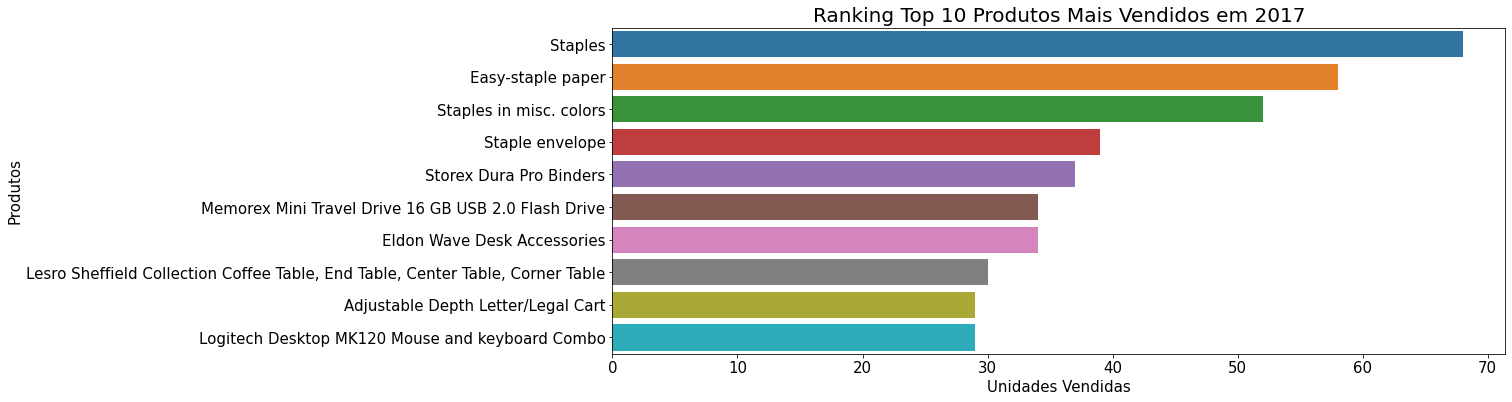

In [236]:
#Vamos plotar um grafico para podermos visualizar melhor isso
plt.figure(figsize =(16,6))
sb.barplot(x = "Quantidade",y = "Nome do Produto", data = top_10_vendas_2017 )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Produtos",fontsize=15)
plt.xlabel("Unidades Vendidas",fontsize=15)
plt.title("Ranking Top 10 Produtos Mais Vendidos em 2017", fontsize=20)

Text(0.5, 1.0, 'Ranking Top 10 Produtos Mais Vendidos em 2016')

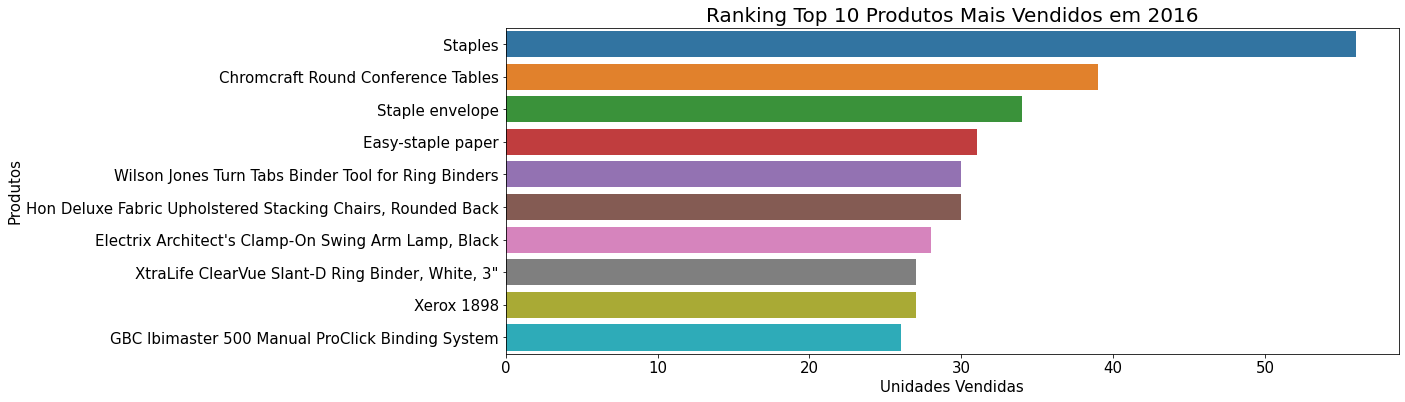

In [237]:
#Vamos plotar um grafico para podermos visualizar melhor isso
plt.figure(figsize =(16,6))
sb.barplot(x = "Quantidade",y = "Nome do Produto", data = top_10_vendas_2016 )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Produtos",fontsize=15)
plt.xlabel("Unidades Vendidas",fontsize=15)
plt.title("Ranking Top 10 Produtos Mais Vendidos em 2016", fontsize=20)

Text(0.5, 1.0, 'Ranking Top 10 Produtos Mais Vendidos em 2015')

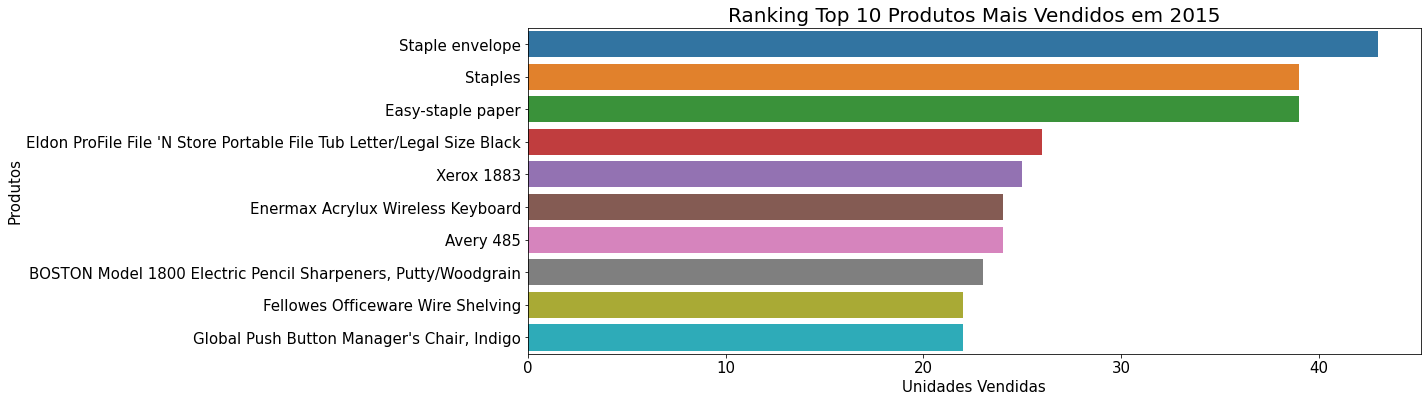

In [238]:
#Vamos plotar um grafico para podermos visualizar melhor isso
plt.figure(figsize =(16,6))
sb.barplot(x = "Quantidade",y = "Nome do Produto", data = top_10_vendas_2015 )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Produtos",fontsize=15)
plt.xlabel("Unidades Vendidas",fontsize=15)
plt.title("Ranking Top 10 Produtos Mais Vendidos em 2015", fontsize=20)

Text(0.5, 1.0, 'Ranking Top 10 Produtos Mais Vendidos em 2014')

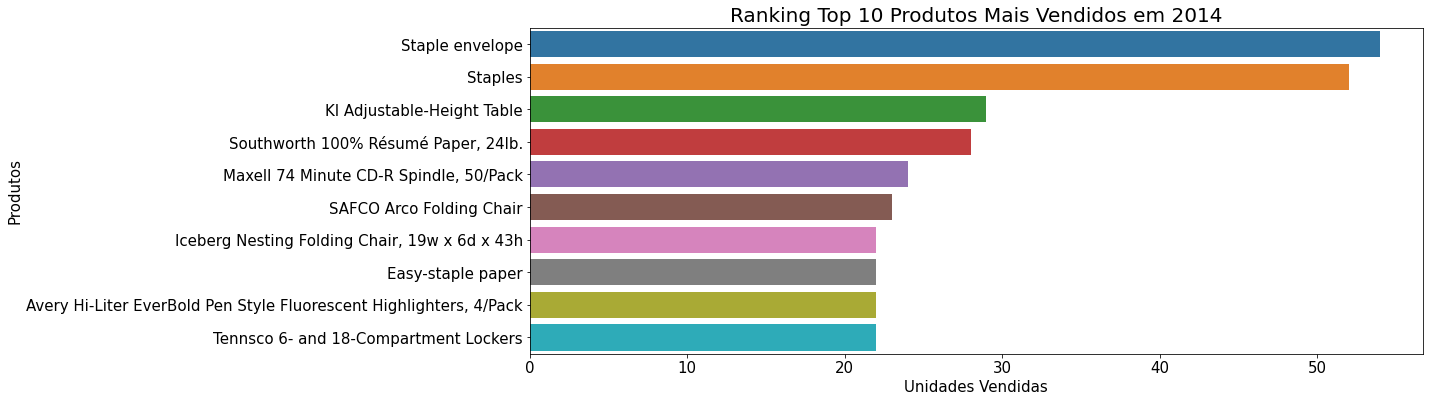

In [239]:
#Vamos plotar um grafico para podermos visualizar melhor isso
plt.figure(figsize =(16,6))
sb.barplot(x = "Quantidade",y = "Nome do Produto", data = top_10_vendas_2014 )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Produtos",fontsize=15)
plt.xlabel("Unidades Vendidas",fontsize=15)
plt.title("Ranking Top 10 Produtos Mais Vendidos em 2014", fontsize=20)

In [245]:
df.loc[df['ID Produto'] == 'TEC-AC-10003832']

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto
235,236,US-2017-100930,2017-04-07,2017-04-12,Standard Class,CS-12400,Christopher Schild,Home Office,United States,Tampa,Florida,33614,South,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,617.976,3,0.2,-7.7247,2017,4,7,2017,4,12,257.49
251,252,CA-2016-145625,2016-09-11,2016-09-17,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,California,92037,West,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,3347.370,13,0.0,636.0003,2016,9,11,2016,9,17,257.49
524,525,US-2016-139486,2016-05-21,2016-05-23,First Class,LH-17155,Logan Haushalter,Consumer,United States,Los Angeles,California,90032,West,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,66.260,2,0.0,27.1666,2016,5,21,2016,5,23,33.13
643,644,CA-2017-106103,2017-06-10,2017-06-15,Standard Class,SC-20305,Sean Christensen,Consumer,United States,Rochester Hills,Michigan,48307,Central,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,132.520,4,0.0,54.3332,2017,6,10,2017,6,15,33.13
675,676,CA-2017-130351,2017-12-05,2017-12-08,First Class,RB-19570,Rob Beeghly,Consumer,United States,Columbus,Indiana,47201,Central,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,99.390,3,0.0,40.7499,2017,12,5,2017,12,8,33.13
1653,1654,US-2017-132444,2017-11-18,2017-11-21,First Class,CD-12280,Christina DeMoss,Consumer,United States,Seattle,Washington,98105,West,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,132.520,4,0.0,54.3332,2017,11,18,2017,11,21,33.13
1910,1911,CA-2016-105963,2016-11-15,2016-11-22,Standard Class,SC-20770,Stewart Carmichael,Corporate,United States,Los Angeles,California,90008,West,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,99.390,3,0.0,40.7499,2016,11,15,2016,11,22,33.13
2666,2667,CA-2016-111794,2016-10-01,2016-10-01,Same Day,HG-15025,Hunter Glantz,Consumer,United States,Amarillo,Texas,79109,Central,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,79.512,3,0.2,20.8719,2016,10,1,2016,10,1,33.13
3370,3371,CA-2016-134887,2016-03-25,2016-03-25,Same Day,TB-21280,Toby Braunhardt,Consumer,United States,Norman,Oklahoma,73071,Central,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,1287.450,5,0.0,244.6155,2016,3,25,2016,3,25,257.49
5018,5019,CA-2014-127558,2014-11-15,2014-11-18,First Class,SS-20410,Shahid Shariari,Consumer,United States,Los Angeles,California,90008,West,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,772.470,3,0.0,146.7693,2014,11,15,2014,11,18,257.49


In [249]:
# FAZER COLUNA LUCRO POR PRODUTO UNITARIO E COLUNA PORCENTAGEM DE LUCRO EM CIMA DO VALOR UNITARIO E COLUNA VALOR MÁXIMO DE DESCONTO PARA MANTER LUCRO

In [255]:
df.groupby(df['Nome do Produto'], as_index = False)['Valor do Pedido'].sum().sort_values(by = 'Valor do Pedido', ascending = False).head(10)

,Nome do Produto,Valor do Pedido
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312
